In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
url = "https://github.com/wiflorez/Data-Visualization-tools/raw/master/data/fuel_econ.csv"
df = pd.read_csv(url)

## Scatterplots
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. 

In [2]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


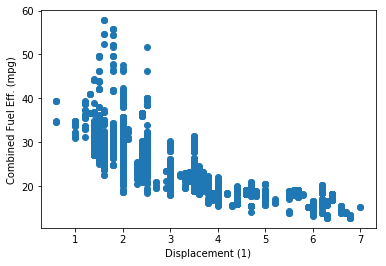

In [3]:
plt.scatter(data = df, x='displ', y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Using SeaBoard

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

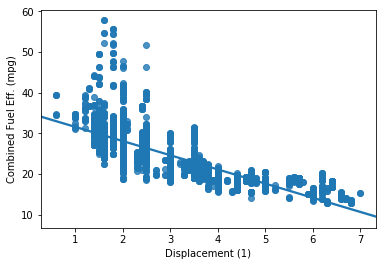

In [4]:
sb.regplot(data = df, x='displ', y='comb')

#sb.regplot(data= df, x='displ', y='comb', reg_fit = False) #remove regression line
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

([<matplotlib.axis.YTick at 0x1a1e1db630>,
 <a list of 6 Text yticklabel objects>)

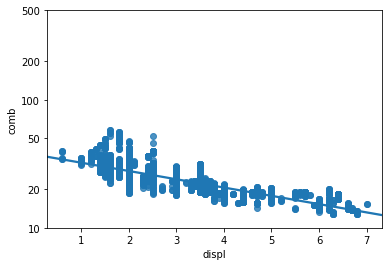

In [5]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)

sb.regplot(df['displ'], df['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)

The x- and y- values sent to regplot are set directly as Series, extracted from the dataframe.

## Overplotting, Transparency, and Jitter

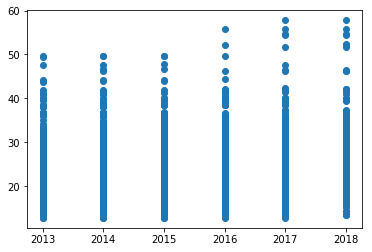

In [6]:
plt.scatter(data = df, x = 'year', y = 'comb')

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from __overplotting__, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

In the above plot, we can infer some kind of negative relationship between the two variables, but the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative.

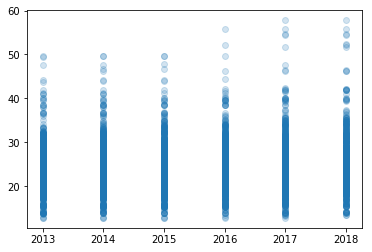

In [7]:
plt.scatter(data = df, x = 'year', y = 'comb', alpha = 1/5)

Where more points overlap, the darker the image will be. Here, we can now see that there is a moderate negative relationship between the two numeric variables. Values of 0 and 10 on the x-axis are much rarer than the central values.

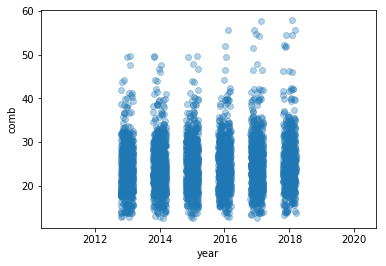

In [8]:
sb.regplot(data = df, x = 'year', y = 'comb', 
           fit_reg = False, x_jitter = 0.2, 
           y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter. This is necessary so that transparency is specifically associated with the scatter component of the regplot function.

## Heat Map

For __quantitative variable__ vs __quantitative variable__

* Good for __discrete variable__ vs __discrete variable__
* Good alternative to transparency for a lot of data
* Bin sizes are important (Too big you may loose data and to small you may be distracted by noise)

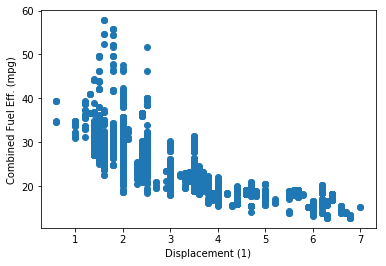

In [9]:
plt.scatter(data = df, x='displ', y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [10]:
df[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


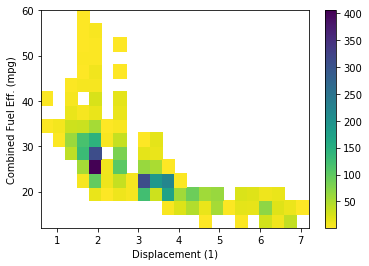

In [11]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, 
           cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color

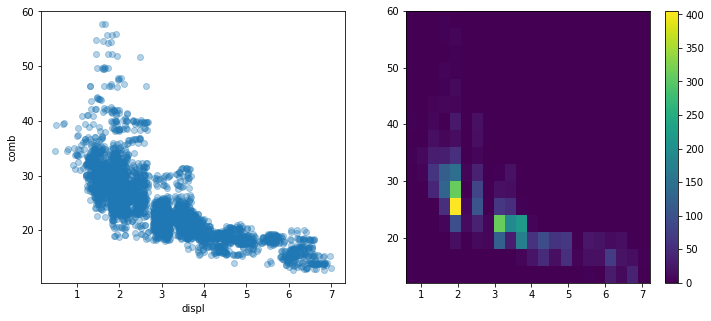

In [12]:
plt.figure(figsize = [12, 5])
# Left plot: scatterplot of discrete data with jitte and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'displ', y = 'comb', fit_reg = False,
          x_jitter = 0.2, y_jitter = 0.2, scatter_kws = { 'alpha': 1/3})

# Right plot: heat map with bins edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', bins = [bins_x, bins_y])

plt.colorbar()

#### Alternative variations

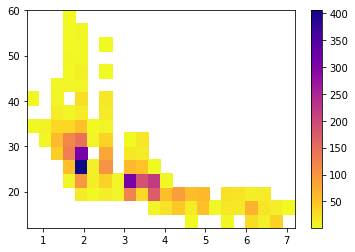

In [13]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', 
           bins = [bins_x, bins_y], cmap = 'plasma_r', cmin = 0.5)

plt.colorbar()

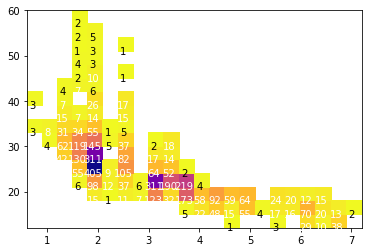

In [14]:
# hist2d returns a number of diffent variables, including an array of counts
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
h2d = plt.hist2d(data = df, x = 'displ', y = 'comb', 
           bins = [bins_x, bins_y], cmap = 'plasma_r', cmin = 0.5)
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c>=7: #incresate visibility on darkest cell
            plt.text(bins_x[i]+0.1, bins_y[j]+0.1, int(c), 
                    ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.1, bins_y[j]+0.1, int(c),
                    ha = 'center', va = 'center', color = 'black')

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves. You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's heatmap function for just that, as will be seen later.

## Violin Plots & Box Plots

### Violin Plot
There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

In [16]:
fuel_econ = df
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

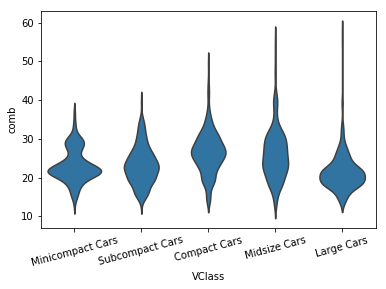

In [22]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, inner = None)
plt.xticks(rotation = 15)

#### Additional variation

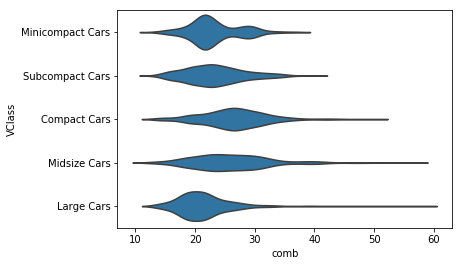

In [23]:
sb.violinplot(data = fuel_econ, y = 'VClass', x = 'comb', color = base_color, inner = None)

### Box Plot
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level.

![title](images/boxPlot.png)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

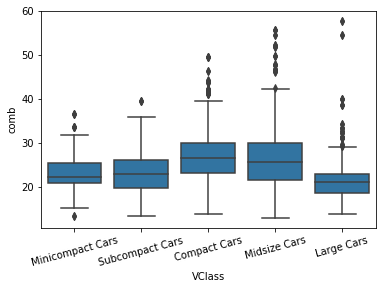

In [24]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

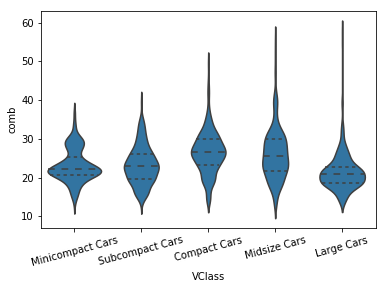

In [25]:
sb.violinplot(data = fuel_econ, 
              x = 'VClass', y = 'comb', 
              color = base_color, inner = 'quartile')
plt.xticks(rotation = 15)

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(6.966470319355816, 63.09321945242605)

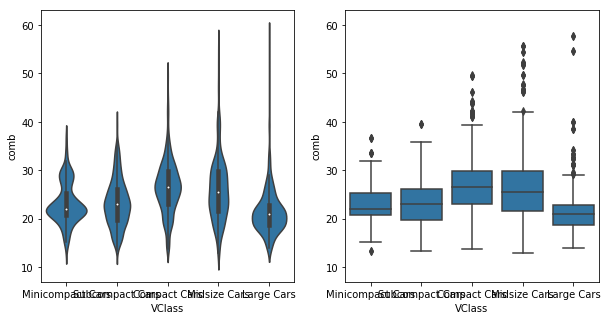

In [26]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

#left plot: Violin plot
plt.subplot(1,2,1)
ax1= sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)

#right plot: Box plot
plt.subplot(1,2,2)
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.ylim(ax1.get_ylim()) # Set y-axis limits to be the same as left plot

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

### Aditional variation

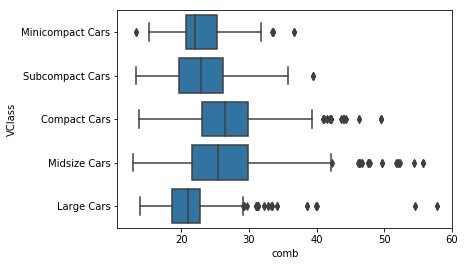

In [27]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, y = 'VClass', x = 'comb', color = base_color)

## Clustered Bar Charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

In [28]:
fuel_econ['trans_type']  = fuel_econ['trans'].apply(lambda x: x.split()[0])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

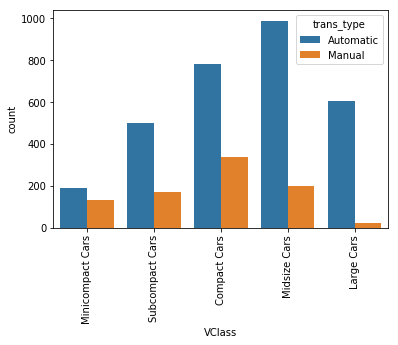

In [33]:
fuel_econ['cat_var1'] = fuel_econ['VClass']
fuel_econ['cat_var2'] = fuel_econ['trans_type']

sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

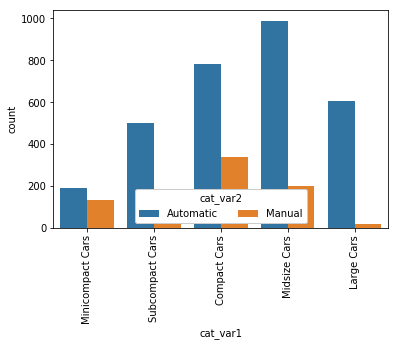

In [32]:
ax = sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')
plt.xticks(rotation=90)

## Alternative Approach (Heat Map)
One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-d version of a histogram; here, we're using them as the 2-d version of a bar chart. The seaborn function heatmap is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [34]:
ct_counts = df.groupby(['cat_var1', 'cat_var2']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'cat_var2', columns = 'cat_var1', values = 'count')

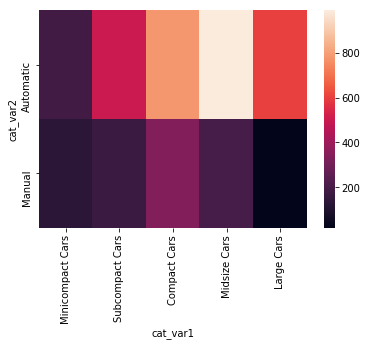

In [35]:
sb.heatmap(ct_counts)

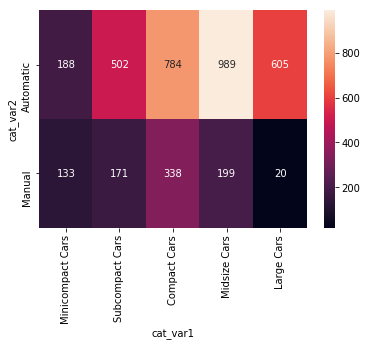

In [36]:
sb.heatmap(ct_counts, annot = True, fmt = 'd')

# Faceting
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. Faceting is most useful in multivariate visualization.

There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by ("cat_var" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, histogram on "num_var").

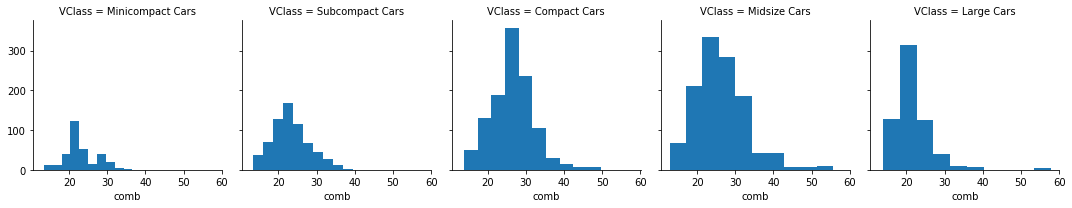

In [37]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, 'comb')

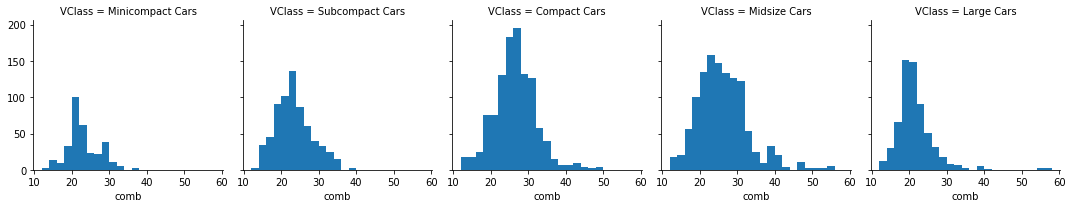

In [38]:
bin_edges = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, 'comb', bins = bin_edges)

### Aditional variation
If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object initialization to facilitate clarity in conveyance of information.

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


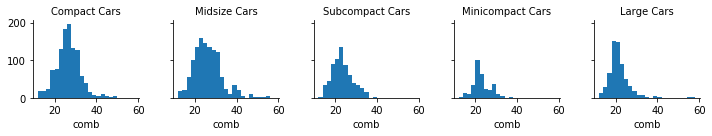

In [39]:
group_means = fuel_econ.groupby(['VClass']).mean()
bin_edges = np.arange(12, 58+2, 2)
group_order = group_means.sort_values(['comb'], ascending = False).index
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 5, size = 2, col_order = group_order)
g.map(plt.hist, 'comb', bins = bin_edges)
g.set_titles('{col_name}')

Other operations may be performed to increase the immediate readability of the plots: setting each facet height to 2 inches ("size"), sorting the facets by group mean ("col_order"), limiting the number of bin edges, and changing the titles of each facet to just the categorical level name using the set_titles method and {col_name} template variable.

## Adaptation of Univariate Plots

### Adapted Bar Charts
Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

Plot a numerical variable against a categorical variable by adapting a bar chart so that its bar heights indicate the means of a numerical variable.

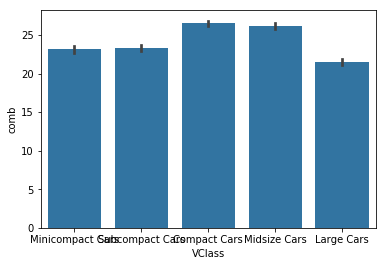

In [40]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

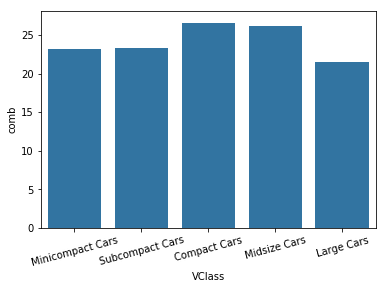

In [41]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, errwidth = 0)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

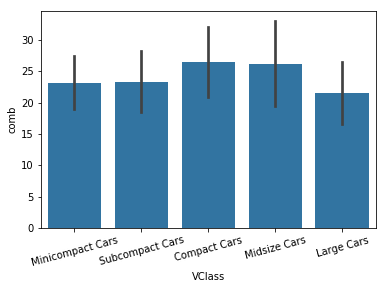

In [42]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, ci = 'sd')
plt.xticks(rotation = 15)

As an alternative, the ```pointplot``` function can be used to plot the averages rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

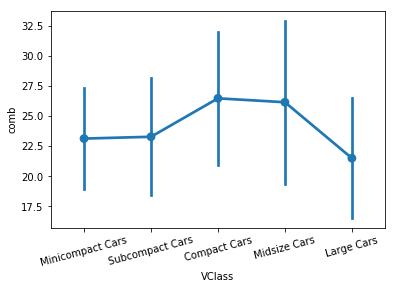

In [43]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd')
plt.xticks(rotation = 15)

By default, pointplotwill connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via ```linestyles = ""``` for nominal data.

Text(0, 0.5, 'Avg. combined fuel eff (mpg)')

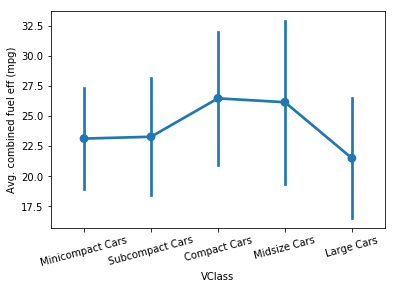

In [44]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd')
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined fuel eff (mpg)')

Text(0, 0.5, 'Avg. combined fuel eff (mpg)')

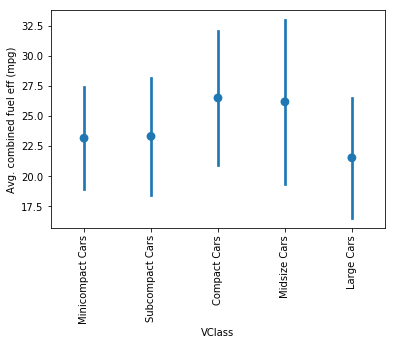

In [52]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = "")
plt.xticks(rotation = 90)
plt.ylabel('Avg. combined fuel eff (mpg)')

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

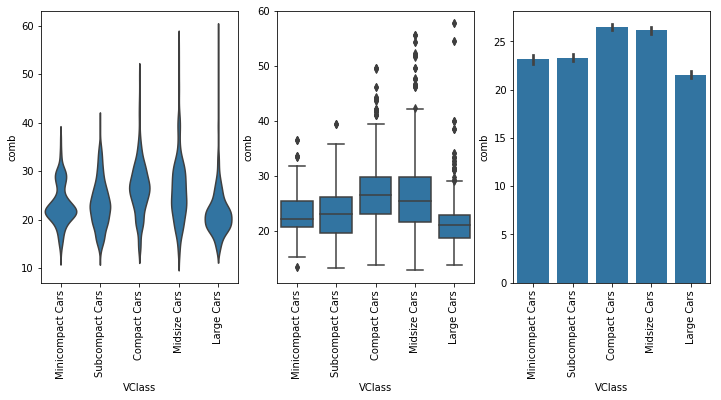

In [47]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'VClass', y = 'comb', inner = None,
              color = base_color)
plt.xticks(rotation = 90) # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation = 90)

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data = df, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation = 90)

![](images/adaptative_plot_violin_bar.png)


### Adaptative histograms

Matplotlib's hist function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" parameter. By default, each data point is given a weight of 1, so that the sum of point weights in each bin is equal to the number of points. If we change the weights to be a representative function of each point's value on a second variable, then the sum will end up representing something other than a count.

Text(0, 0.5, 'comb')

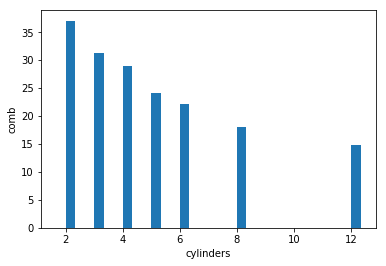

In [66]:
bin_edges = np.arange(df['cylinders'].min()-1/3, df['cylinders'].max()+1/3, 1/3)

# count number of points in each bin
bin_idxs = pd.cut(df['cylinders'], bin_edges, right = False, include_lowest = True,
                  labels = False).astype(int)
pts_per_bin = df.groupby(bin_idxs).size()

num_var_wts = df['comb'] / pts_per_bin[bin_idxs].values

# plot the data using the calculated weights
plt.hist(data = df, x = 'cylinders', bins = bin_edges, weights = num_var_wts)
plt.xlabel('cylinders')
plt.ylabel('comb')

To get the mean of the y-variable ("binary_out") in each bin, the weight of each point should be equal to the y-variable value, divided by the number of points in its x-bin (num_var_wts). As part of this computation, we make use of pandas' cut function in order to associate each data point to a particular bin (bin_idxs). The labels = False parameter means that each point's bin membership is associated by a numeric index, rather than a string. We use these numeric indices into the pts_per_bin, with the .values at the end necessary in order for the Series' indices to not be confused between the indices of df['binary_out'].

![](images/binary_output.png)

This plot shows that the average outcome of the y-variable "binary_out" generally increases across values of the x-variable "num_var".

# Line Plots

![](images/why-lines-instead-of-bars.png) 

The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a __time series__ plot. Often, we have only one observation per time period, like in stock or currency charts. 

Text(0, 0.5, 'Avg. combined fuel eff (mpg)')

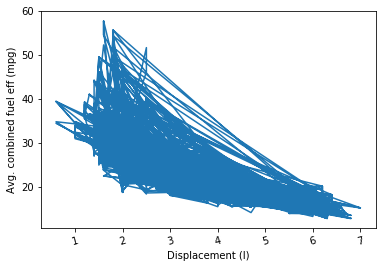

In [67]:
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb')
plt.xticks(rotation = 15)
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. combined fuel eff (mpg)')

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

Text(0, 0.5, 'comb')

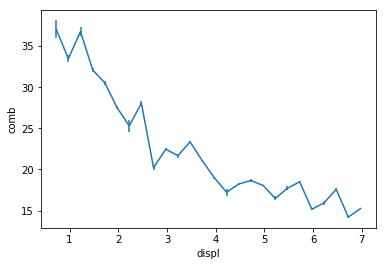

In [68]:
# Set bin edges, compute centers
bin_size = 0.25
xbin_edges = np.arange(0.6, fuel_econ['displ'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(fuel_econ['displ'], xbin_edges, right = False, include_lowest = True)
y_means = fuel_econ['comb'].groupby(data_xbins).mean()
y_sems = fuel_econ['comb'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('displ')
plt.ylabel('comb')

Since the x-variable ('num_var1') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean

### Alternate Variations
Instead of computing summary statistics on fixed bins, you can also make computations on a rolling window through use of pandas' ```rolling``` method. Since the rolling window will make computations on sequential rows of the dataframe, we should use ```sort_values``` to put the x-values in ascending order first.

Text(0, 0.5, 'co2')

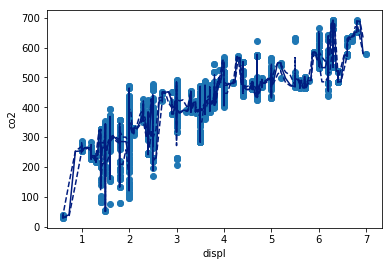

In [123]:
# Compute statistics in rolling window
df_window = fuel_econ[["displ", "co2"]].sort_values('displ').rolling(3)
x_winmean = df_window.mean()['displ']
y_median = df_window.median()['co2']
y_q1 = df_window.quantile(.25)['co2']
y_q3 = df_window.quantile(.75)['co2']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = fuel_econ, x = 'displ', y = 'co2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')
plt.xlabel('displ')
plt.ylabel('co2')

Another bivariate application of line plots is to plot the distribution of a numeric variable for different levels of a categorical variable. This is another alternative to using violin plots, box plots, and faceted histograms. With the line plot, one line is plotted for each category level, like overlapping the histograms on top of one another. This can be accomplished through multiple ```errorbar``` calls using the methods above, or by performing multiple ```hist``` calls, setting the "histtype = step" parameter so that the bars are depicted as unfilled lines.

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


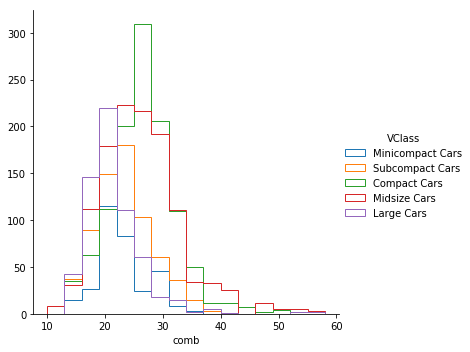

In [124]:
bin_edges = np.arange(10, fuel_econ['comb'].max()+3, 3)
g = sb.FacetGrid(data = fuel_econ, hue = 'VClass', size = 5)
g.map(plt.hist, "comb", bins = bin_edges, histtype = 'step')
g.add_legend()

Unfortunately, the "Alpha" curve seems to be pretty lost behind the other three curves since the relatively low number of counts is causing a lot of overlap. Perhaps connecting the centers of the bars with a line, like what was seen in the first ```errorbar``` example, would be better.

Functions you provide to the ```map``` method of FacetGrid objects do not need to be built-ins. Below, I've written a function to perform the summarization operations seen above to plot an ```errorbar``` line for each level of the categorical variable, then fed that function (```freq_poly```) to ```map```.

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


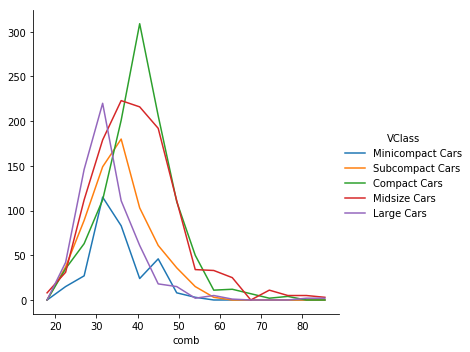

In [125]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linespace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1] / 2)
    
    # compute counts
    data_bins = pd.cut(x, bins, right = False, include_lowest = True)
    counts = x.groupby(data_bins).count()
    
    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)
    
bin_edges = np.arange(10, fuel_econ['comb'].max()+3, 3)
g = sb.FacetGrid(data = fuel_econ, hue = 'VClass', size = 5)
g.map(freq_poly, "comb", bins = bin_edges)
g.add_legend()

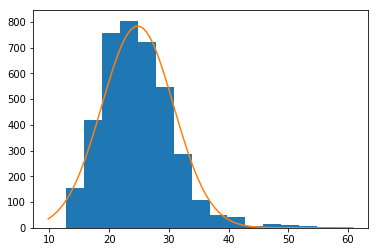

In [148]:
# create a histogram of the data
def histogram_sb(variable, min_bound, max_bound, bin_size):
    bin_edges = np.arange(min_bound, max_bound, bin_size)
    plt.hist(data = df, x = variable.name, bins = bin_edges);

    # overlay a theoretical normal distribution on top
    samp_mean = variable.mean()
    samp_sd = variable.std()

    from scipy.stats import norm
    x = np.linspace(min_bound, max_bound, 100)
    y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
    y *= df.shape[0] * bin_size # scale the distribution height

    plt.plot(x, y)

bin_size = 3
variable = fuel_econ['comb']
min_bound = variable.min()-bin_size
max_bound = variable.max()+bin_size
histogram_sb(variable, min_bound, max_bound, bin_size)


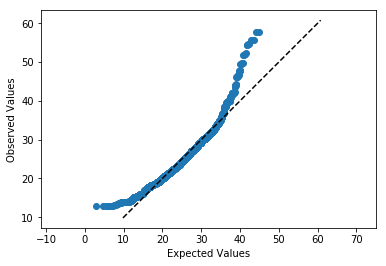

In [156]:
def qqplot_sb(variable, min_bound, max_bound):
    from scipy.stats import norm
    # overlay a theoretical normal distribution on top
    samp_mean = variable.mean()
    samp_sd = variable.std()
    n_points = variable.shape[0]
    qs = (np.arange(n_points) - .5) / n_points
    expected_vals = norm.ppf(qs, samp_mean, samp_sd)


    plt.scatter(expected_vals, variable.sort_values())
    plt.plot([min_bound,max_bound],[min_bound,max_bound],'--', color = 'black')
    plt.axis('equal')
    plt.xlabel('Expected Values')
    plt.ylabel('Observed Values')
qqplot_sb(variable, min_bound, max_bound)

## QQPLOT
There might be cases where you are interested to see how closely your numeric data follows some hypothetical distribution. This might be important for certain parametric statistical tests, like checking for assumptions of normality. In cases like this, you can use a quantile-quantile plot, or Q-Q plot, to make a visual comparison between your data and your reference distribution. Take for example the following comparison of the following data and a hypothetical normal distribution using the sample statistics

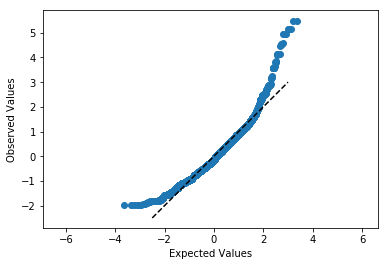

In [155]:
def qqplot_sb(variable):
    from scipy.stats import norm
    # overlay a theoretical normal distribution on top
    
    n_points = variable.shape[0]
    qs = (np.arange(n_points) - .5) / n_points
    expected_scores = norm.ppf(qs)
    samp_mean = variable.mean()
    samp_sd = variable.std()
    data_scores = (variable.sort_values() - samp_mean) / samp_sd

    plt.scatter(expected_scores, data_scores)
    plt.plot([-2.5,3],[-2.5,3],'--', color = 'black')
    plt.axis('equal')
    plt.xlabel('Expected Standard Scores')
    plt.ylabel('Observed Standard Scores')
qqplot_sb(variable)

## Swarm Plots
In this lesson, you saw many ways of depicting the relationship between a numeric variable and a categorical variable. Violin plots depicted distributions as density curves, while box plots took a more summary approach, plotting the quantiles as boxes with whiskers. Another alternative to these plots is the swarm plot. Similar to a scatterplot, each data point is plotted with position according to its value on the two variables being plotted. Instead of randomly jittering points as in a normal scatterplot, points are placed as close to their actual value as possible without allowing any overlap. A swarm plot can be created in seaborn using the swarmplot function, similar to how you would a call violinplot or boxplot

(-59.380388092541274, 776.5798168734049)

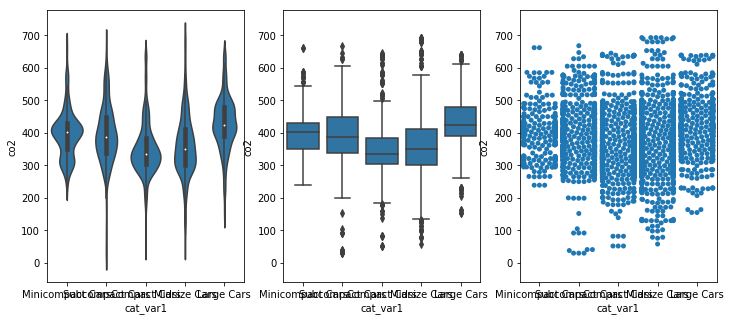

In [166]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = df, x = 'cat_var1', y = 'co2', color = base_color)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'cat_var1', y = 'co2', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data = df, x = 'cat_var1', y = 'co2', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

## Rug and Strip Plots
You might encounter, or be interested in, marginal distributions that are plotted alongside bivariate plots such as scatterplots. A marginal distribution is simply the univariate distribution of a variable, ignoring the values of any other variable. For quantitative data, histograms or density curves are fine choices for marginal plot, but you might also see the rug plot employed. In a rug plot, all of the data points are plotted on a single axis, one tick mark or line for each one. Compared to a marginal histogram, the rug plot suffers somewhat in terms of readability of the distribution, but it is more compact in its representation of the data.

Seaborn's JointGrid class enables this plotting of bivariate relationship with marginal univariate plots for numeric data. The plot_joint method specifies a plotting function for the main, joint plot for the two variables, while the plot_marginals method specifies the plotting function for the two marginal plots. Here, we make use of seaborn's rugplot function.

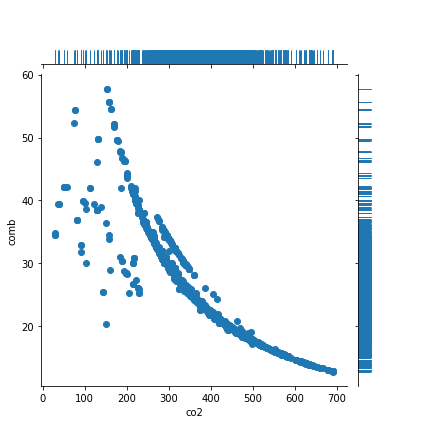

In [162]:
g = sb.JointGrid(data = df, x = 'co2', y = 'comb')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height = 0.25)

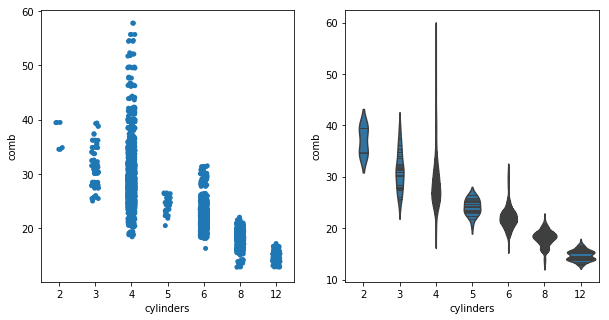

In [160]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sb.stripplot(data = df, x = 'cylinders', y = 'comb',
                   color = base_color)

# right plot: violin plot with inner strip plot as lines
plt.subplot(1, 2, 2)
sb.violinplot(data = df, x = 'cylinders', y = 'comb', color = base_color,
             inner = 'stick')

## Ridgeline Plots
One of the hot new visualization types from recent years is the ridgeline plot. In a nutshell, the ridgeline plot is a series of vertically faceted line plots or density curves, but with somewhat overlapping y-axes. This can be thought of as a contrast to the line plot variation seen in the "Line Plots" part of the lesson, where multiple lines were plotted on the same axes, with different hues. On this page, I'll walk through the creation of a ridgeline plot using some of the demonstration data shown in the "Faceting" page:

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


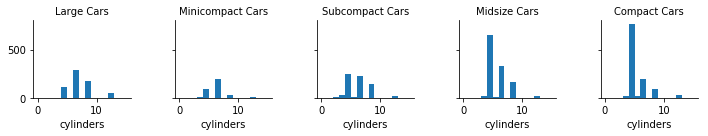

In [165]:
group_means = df.groupby(['cat_var1']).mean()
group_order = group_means.sort_values(['cylinders'], ascending = False).index

g = sb.FacetGrid(data = df, col = 'cat_var1', col_wrap = 5, size = 2,
                 col_order = group_order)
g.map(plt.hist, 'cylinders', bins = np.arange(0, 15+1, 1))
g.set_titles('{col_name}')

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


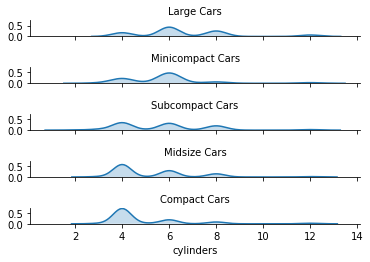

In [167]:
group_means = df.groupby(['cat_var1']).mean()
group_order = group_means.sort_values(['cylinders'], ascending = False).index

g = sb.FacetGrid(data = df, row = 'cat_var1', size = 0.75, aspect = 7,
                 row_order = group_order)
g.map(sb.kdeplot, 'cylinders', shade = True)
g.set_titles('{row_name}')

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/JamesAir/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/JamesAir/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


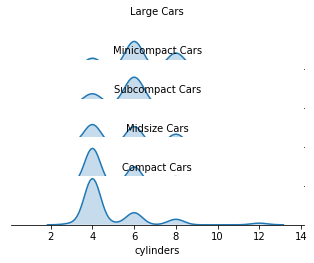

In [170]:
group_means = df.groupby(['cat_var1']).mean()
group_order = group_means.sort_values(['cylinders'], ascending = False).index

# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = df, row = 'cat_var1', size = 0.75, aspect = 7,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'cylinders', shade = True)

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

g.set_titles('{row_name}')

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/JamesAir/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/JamesAir/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/JamesAir/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/Jam

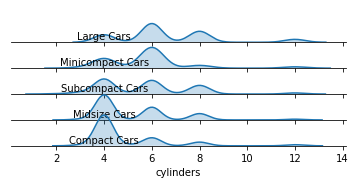

In [171]:
group_means = df.groupby(['cat_var1']).mean()
group_order = group_means.sort_values(['cylinders'], ascending = False).index

g = sb.FacetGrid(data = df, row = 'cat_var1', size = 0.5, aspect = 12,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'cylinders', shade = True)

g.set(yticks=[])
g.despine(left=True)

# set the transparency of each subplot to full
g.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha = 'center', va = 'bottom')
g.map(label_text, 'cat_var1')
g.set_xlabels('cylinders')
g.set_titles('')